Data Preprocessing

In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset/OnlineRetail.csv', encoding='ISO-8859-1')

# Check for missing values before handling them
missing_values_before = df.isnull().sum()
print("Missing values before handling:\n", missing_values_before)

# Handling Missing Values
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

# Data Type Conversion
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Handling Cancellations
cancellations = df[df['InvoiceNo'].str.contains('C', na=False)]
df = df[~df['InvoiceNo'].str.contains('C', na=False)]

# Filtering Data
df = df[df['Quantity'] > 0]

# Save the preprocessed data to a new file
df.to_csv('dataset/OnlineRetail_Preprocessed.csv', index=False)

Missing values before handling:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Data Exploration and Visualization

            Quantity                    InvoiceDate      UnitPrice  \
count  392732.000000                         392732  392732.000000   
mean       13.153718  2011-07-10 19:15:24.576301568       3.125596   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       181.588420                            NaN      22.240725   

          CustomerID  
count  392732.000000  
mean    15287.734822  
min     12346.000000  
25%     13955.000000  
50%     15150.000000  
75%     16791.000000  
max     18287.000000  
std      1713.567773  


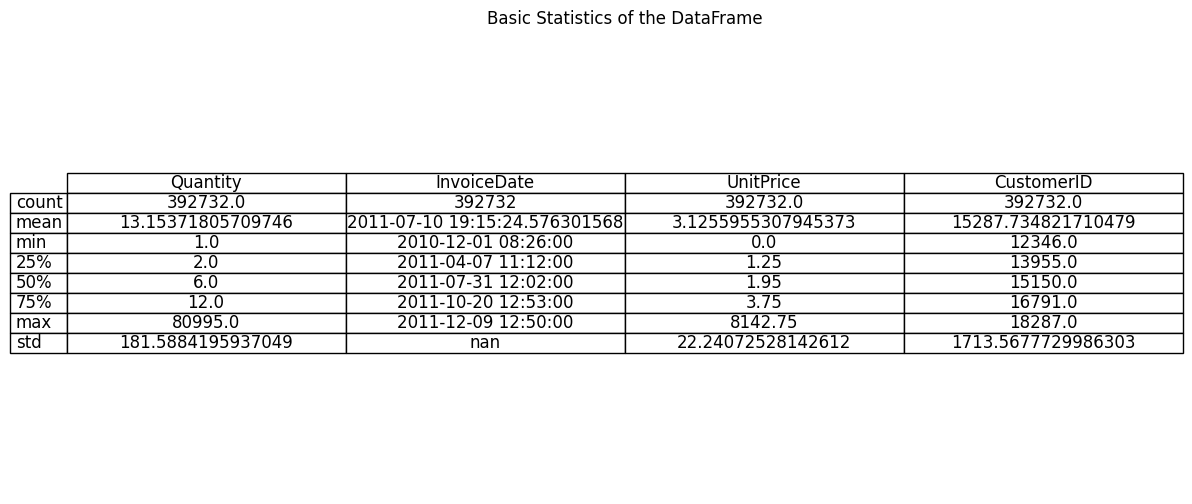

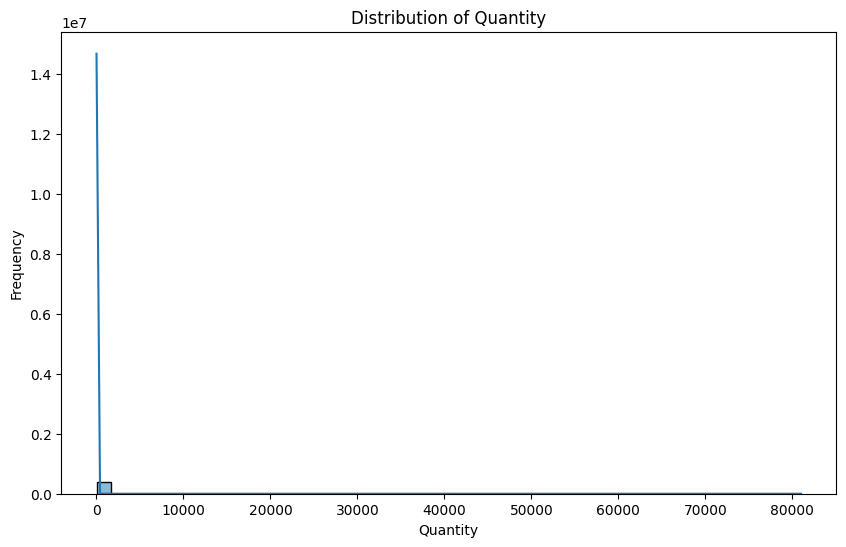

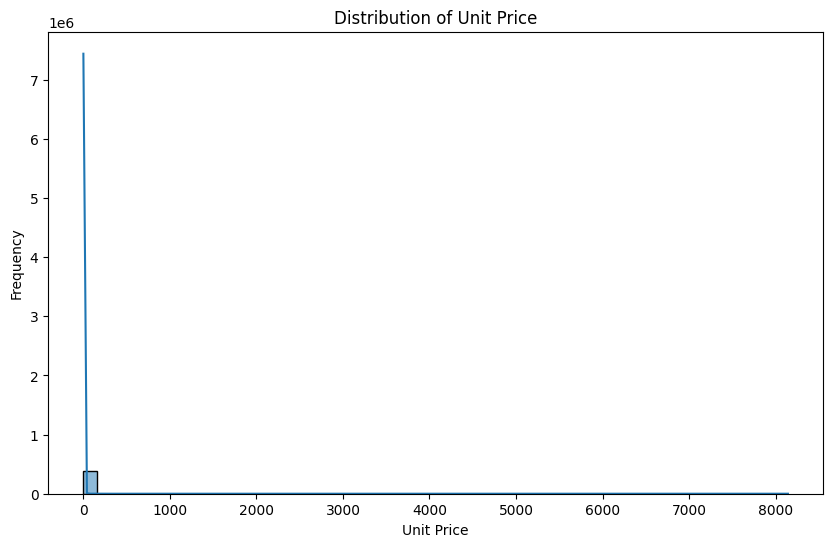

C:\Users\User\AppData\Local\Temp\ipykernel_17636\2350085536.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')


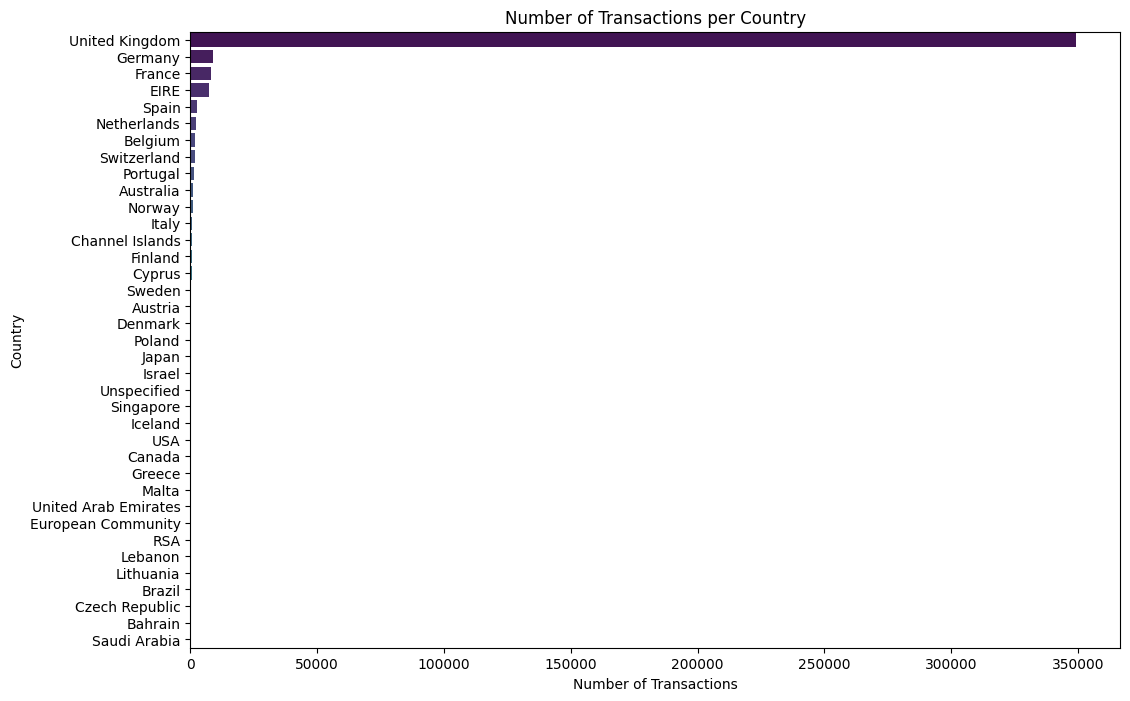

C:\Users\User\AppData\Local\Temp\ipykernel_17636\2350085536.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_quantity.index, x=country_quantity.values, palette='viridis')


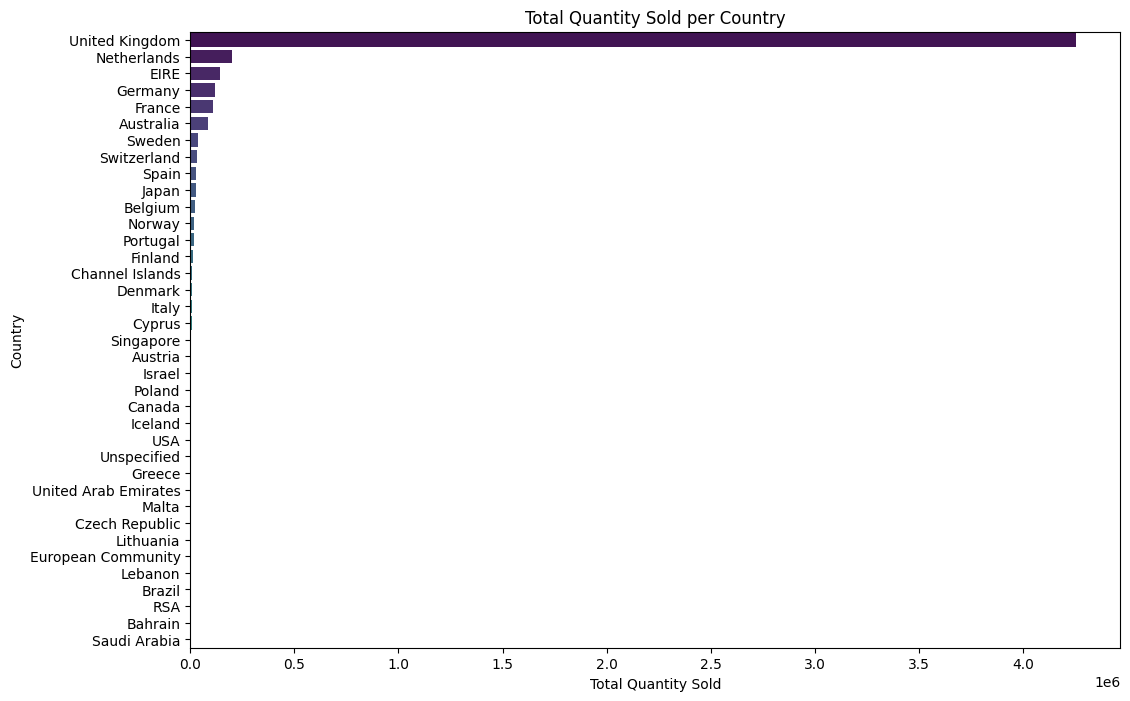

C:\Users\User\AppData\Local\Temp\ipykernel_17636\2350085536.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_revenue.index, x=country_revenue.values, palette='viridis')


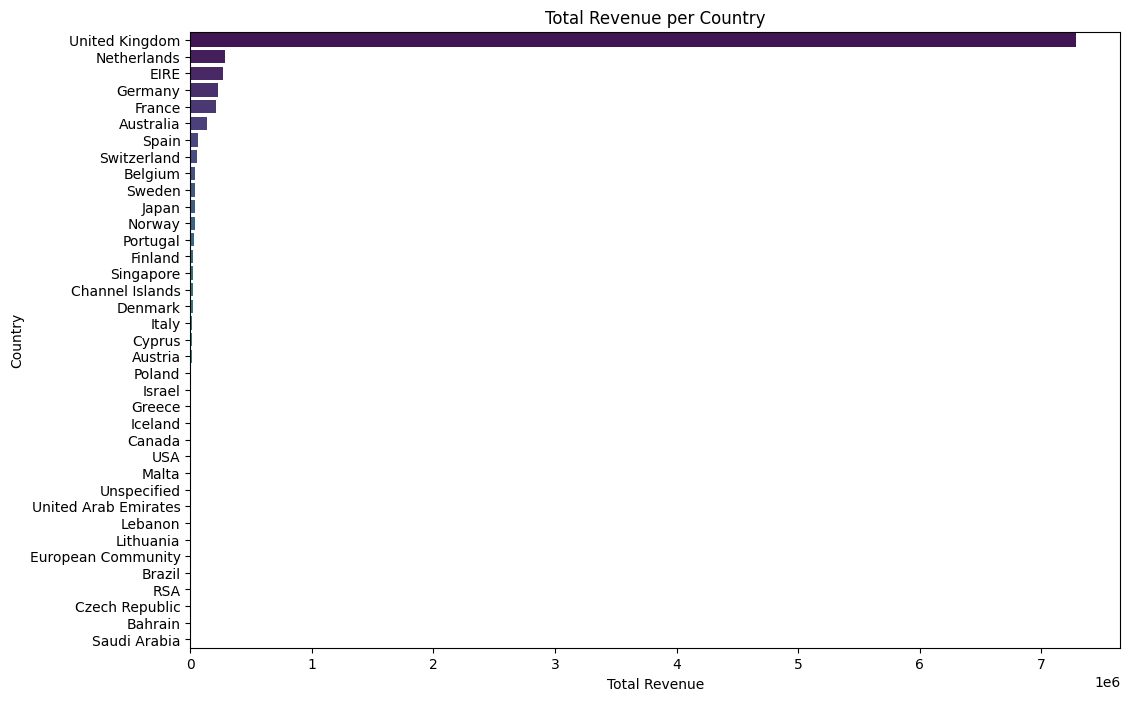

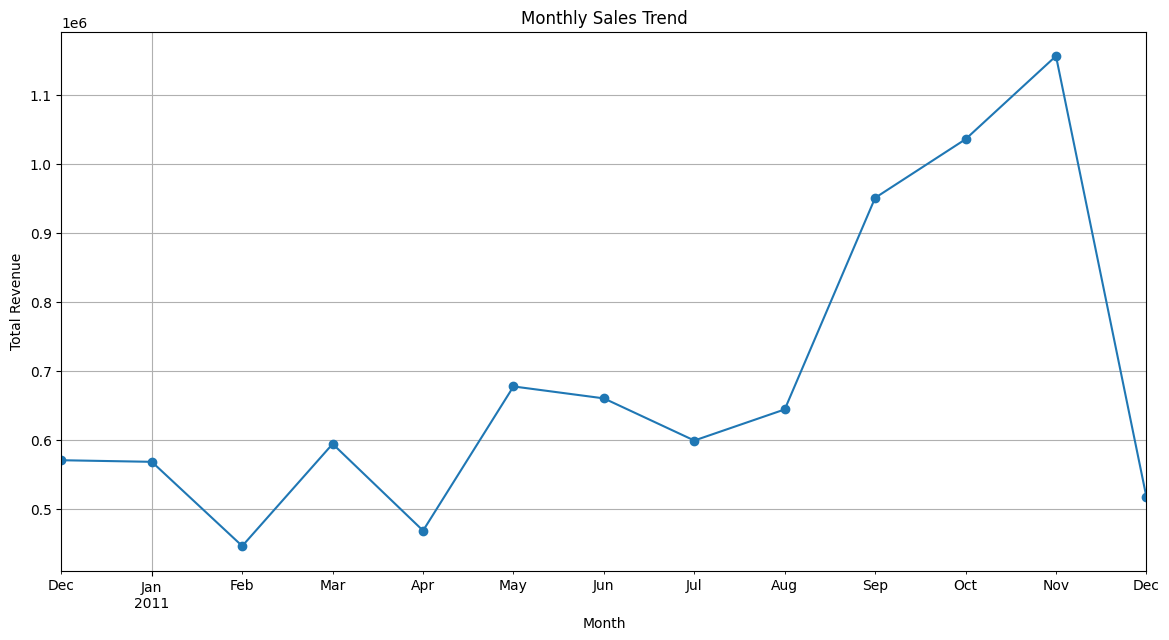

In [23]:
import seaborn as sns

import matplotlib.pyplot as plt

# Display basic statistics
print(df.describe())

# Display basic statistics as a table using matplotlib
plt.figure(figsize=(12, 6))
plt.title('Basic Statistics of the DataFrame')
plt.axis('off')
table = plt.table(cellText=df.describe().values, 
                  colLabels=df.describe().columns, 
                  rowLabels=df.describe().index, 
                  cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()

# Plot the distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Plot the number of transactions per country
plt.figure(figsize=(12, 8))
country_counts = df['Country'].value_counts()
sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')
plt.title('Number of Transactions per Country')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

# Plot the total quantity sold per country
plt.figure(figsize=(12, 8))
country_quantity = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(y=country_quantity.index, x=country_quantity.values, palette='viridis')
plt.title('Total Quantity Sold per Country')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()

# Plot the total revenue per country
df['Revenue'] = df['Quantity'] * df['UnitPrice']
plt.figure(figsize=(12, 8))
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(y=country_revenue.index, x=country_revenue.values, palette='viridis')
plt.title('Total Revenue per Country')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

# Plot the monthly sales trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

Feature Selection and Dimensionality Reduction

Selected Features by RFE: Index(['Quantity', 'UnitPrice', 'Country'], dtype='object')


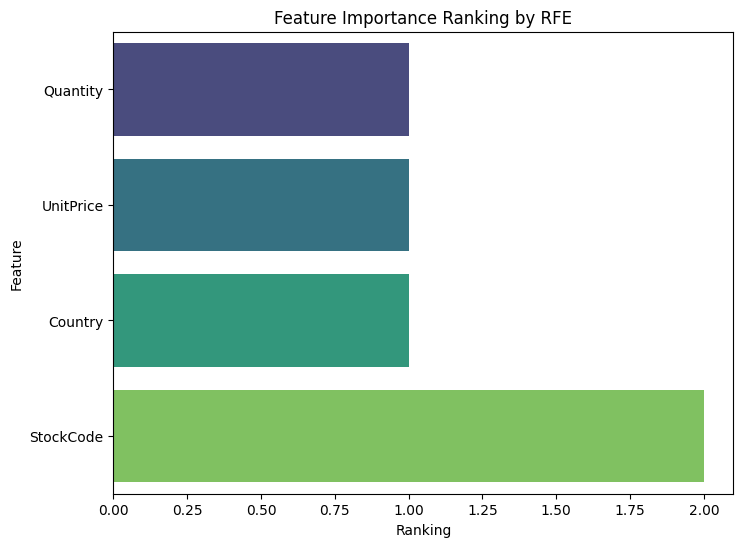

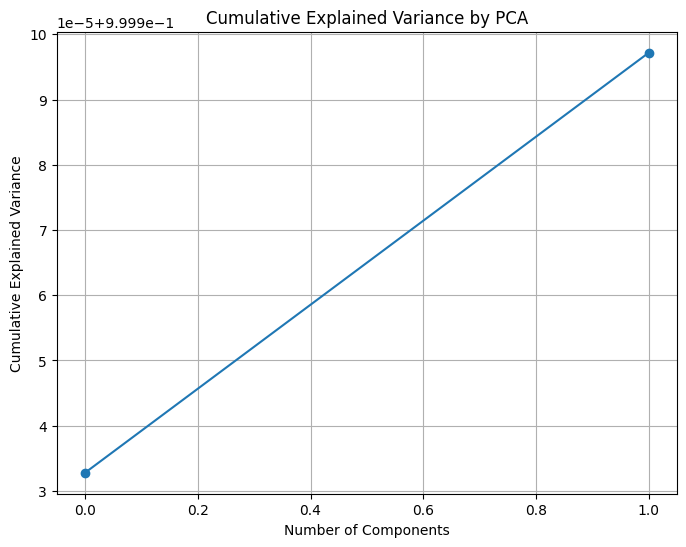

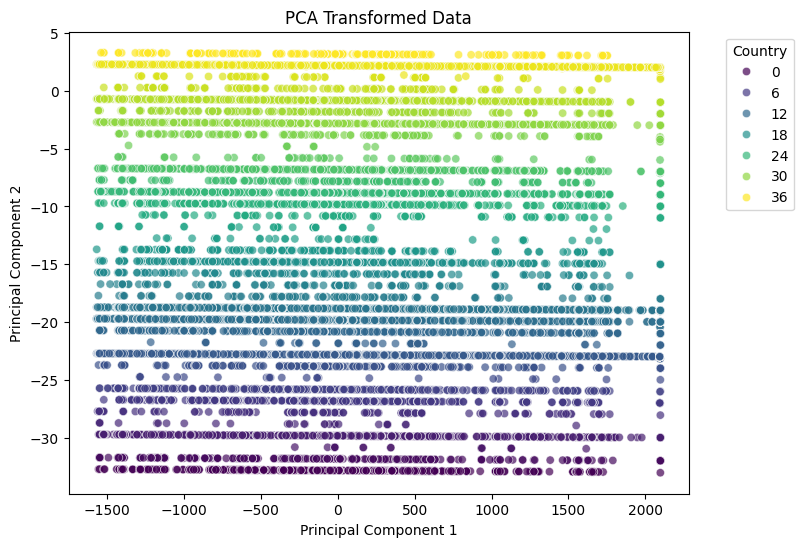

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('dataset/OnlineRetail_Preprocessed.csv')

# Drop irrelevant columns
df = df.drop(['InvoiceNo', 'Description', 'InvoiceDate'], axis=1)

# Encode categorical variables (e.g., StockCode and Country)
label_encoder = LabelEncoder()
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])
df['Country'] = label_encoder.fit_transform(df['Country'])

# Standardize numeric features
numeric_features = ['Quantity', 'UnitPrice']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Define features (X) and target (y)
X = df.drop(['CustomerID'], axis=1)  # Drop CustomerID to focus on behavior analysis
y = df['CustomerID']  # Grouping by CustomerID for customer behavior

# Initialize RFE with Random Forest
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)  # Reduce complexity
rfe = RFE(estimator=model, n_features_to_select=3)  # Select top 3 features
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

# Visualize feature importances
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_ranking, x='Ranking', y='Feature', 
            hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Feature Importance Ranking by RFE')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Retain 95% of the variance
X_pca = pca.fit_transform(X)

# Visualize explained variance
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Step 4: Save PCA Transformed Data
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df.to_csv('dataset/OnlineRetail_PCA.csv', index=False)

# Visualize PCA-transformed data (first 2 components if available)
plt.figure(figsize=(8, 6))
if 'PC2' in pca_df.columns:
    sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df.loc[X.index, 'Country'],
                    palette='viridis', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
else:
    sns.scatterplot(x=pca_df['PC1'], y=[0]*len(pca_df), hue=df.loc[X.index, 'Country'], 
                    palette='viridis', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Constant Value (No PC2)')
plt.title('PCA Transformed Data')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Classification Techniques

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Optimize dataset size by sampling (optional for large datasets)
X = X.sample(frac=0.05, random_state=42)  # Reduce the fraction to 0.05
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42, max_iter=2000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression Classifier
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_class_report = classification_report(y_test, y_pred_log_reg)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", log_reg_class_report)
print("Logistic Regression Confusion Matrix:\n", log_reg_conf_matrix)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree Classifier
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_class_report = classification_report(y_test, y_pred_decision_tree)
decision_tree_conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)

print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Classification Report:\n", decision_tree_class_report)
print("Decision Tree Confusion Matrix:\n", decision_tree_conf_matrix)

Advanced Classification Methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Optimize dataset size by sampling (optional for large datasets)
X_sample1 = X.sample(frac=0.1, random_state=42)  # Reduce the fraction to 0.1
y_sample1 = y.loc[X_sample1.index]

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample1, y_sample1, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)
y_pred_random_forest = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
random_forest_class_report = classification_report(y_test, y_pred_random_forest)
random_forest_conf_matrix = confusion_matrix(y_test, y_pred_random_forest)

print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Classification Report:\n", random_forest_class_report)
print("Random Forest Confusion Matrix:\n", random_forest_conf_matrix)

# Optimize dataset size by sampling (optional for large datasets)
X_sample2 = X.sample(frac=0.05, random_state=42)  # Reduce the fraction to 0.1
y_sample2 = y.loc[X_sample2.index]

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample2, y_sample2, test_size=0.2, random_state=42)
# Evaluate Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,
                                            subsample=0.8, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Clustering Techniques

In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Sample 10% of the data for faster computation (adjust percentage if needed)
sample_size = int(0.1 * len(X))
X_sampled = X.sample(frac=1, random_state=42)  # Use Pandas DataFrame for sampling
X_sampled_np = X_sampled.values  # Convert to NumPy array for clustering

# Apply PCA to reduce dimensions for clustering visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled_np)  # Use the sampled data

# Clustering: K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_sampled_np)  # Use the same sampled data

# Calculate silhouette score for K-Means
kmeans_silhouette = silhouette_score(X_sampled_np, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Visualize K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Clustering: Hierarchical
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_sampled_np)  # Use the same sampled data

# Calculate silhouette score for Hierarchical Clustering
hierarchical_silhouette = silhouette_score(X_sampled_np, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

# Visualize Hierarchical Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


KeyboardInterrupt: 

Advanced Clustering Techniques

DBSCAN Silhouette Score: 0.4402309072927846


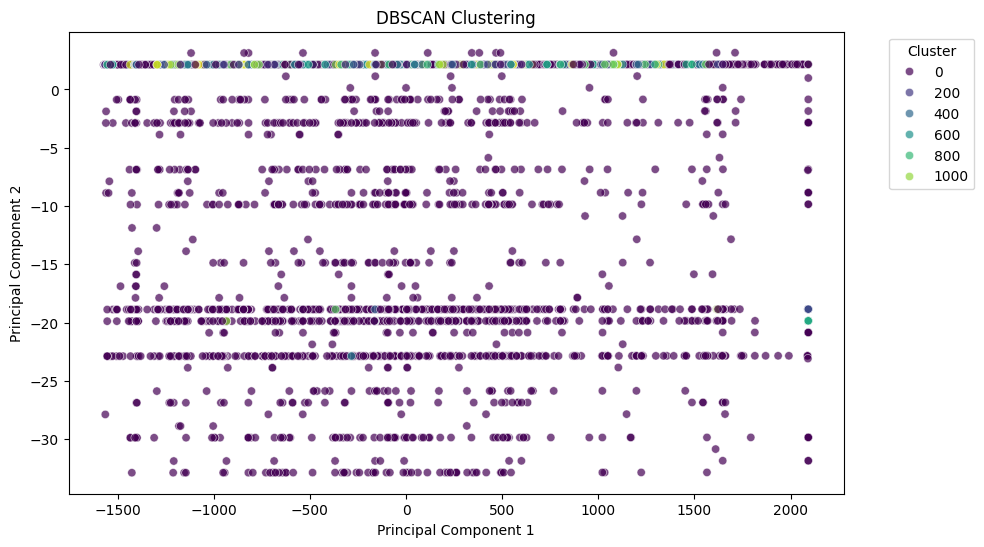

Gaussian Mixture Model Silhouette Score: -0.008158730709361166


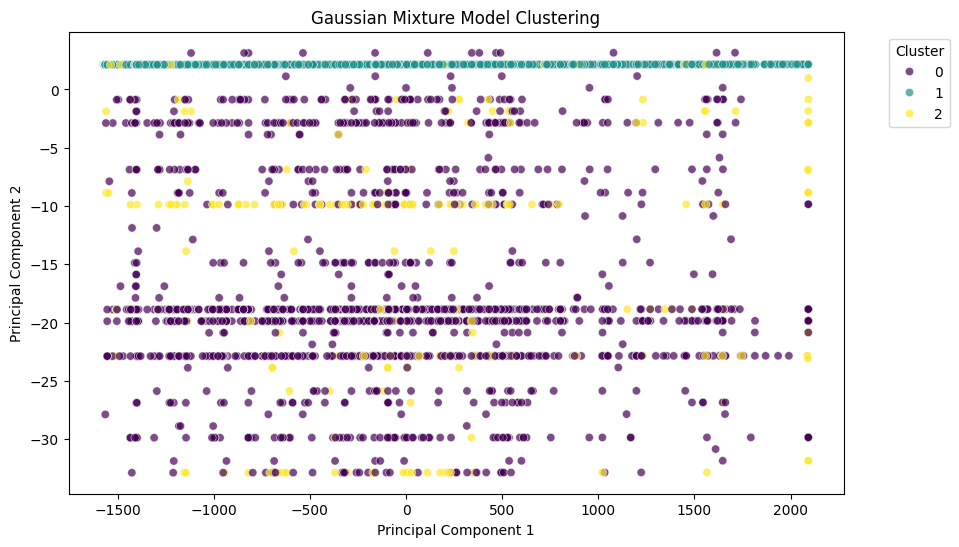

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_sampled_np)  

# Check if DBSCAN identified more than one cluster
if len(set(dbscan_labels)) > 1:
	# Calculate silhouette score for DBSCAN
	dbscan_silhouette = silhouette_score(X_sampled_np, dbscan_labels)
	print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

	# Visualize DBSCAN Clusters
	plt.figure(figsize=(10, 6))
	sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='viridis', alpha=0.7)
	plt.title('DBSCAN Clustering')
	plt.xlabel('Principal Component 1')
	plt.ylabel('Principal Component 2')
	plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.show()
else:
	print("DBSCAN did not identify more than one cluster. Adjust the parameters.")

# Apply Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_sampled_np) 

# Calculate silhouette score for GMM
gmm_silhouette = silhouette_score(X_sampled_np, gmm_labels)
print(f"Gaussian Mixture Model Silhouette Score: {gmm_silhouette}")

# Visualize GMM Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='viridis', alpha=0.7)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Association Rule Mining

Frequent Itemsets:
       support                                           itemsets
0    0.021688                         (3 STRIPEY MICE FELTCRAFT)
1    0.039167                           (6 RIBBONS RUSTIC CHARM)
2    0.025140                  (60 CAKE CASES VINTAGE CHRISTMAS)
3    0.035445                      (60 TEATIME FAIRY CAKE CASES)
4    0.027028                   (72 SWEETHEART FAIRY CAKE CASES)
..        ...                                                ...
238  0.023522  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...
239  0.024547  (RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI...
240  0.022659  (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...
241  0.025248  (WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...
242  0.021040  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...

[243 rows x 2 columns]
Association Rules:
                                           antecedents  \
0                        (ALARM CLOCK BAKELIKE GREEN)   
1                         (ALARM CLOCK BAK

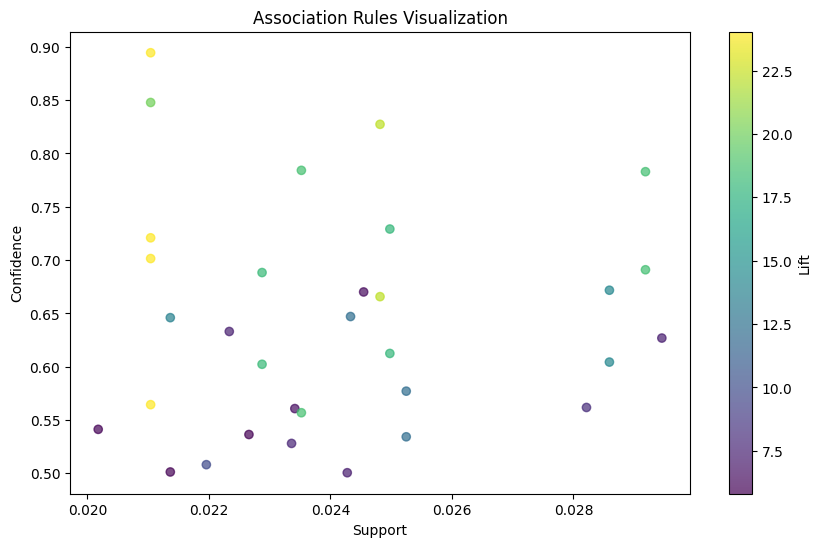

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset/OnlineRetail_Preprocessed.csv')

# Filter necessary columns for transactions
transactions = df.groupby('InvoiceNo')['Description'].apply(list)

# Encode transactions into a binary format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_transactions, min_support=0.02, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets)

# Save the frequent itemsets to a CSV file
frequent_itemsets.to_csv('dataset/Frequent_Itemsets.csv', index=False)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets=100)
print("Association Rules:\n", rules)

# Save the Association Rules to a CSV file
rules.to_csv('dataset/Association_Rules.csv', index=False)

# Filter and sort rules by confidence and lift
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=False)
print("Sorted Rules:\n", sorted_rules)

# Save the Sorted Rules to a CSV file
sorted_rules.to_csv('dataset/Sorted_Rules.csv', index=False)

# Visualize the top rules
plt.figure(figsize=(10, 6))
plt.scatter(sorted_rules['support'], sorted_rules['confidence'], alpha=0.7,
             c=sorted_rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Visualization')
plt.show()


Anomaly Detection

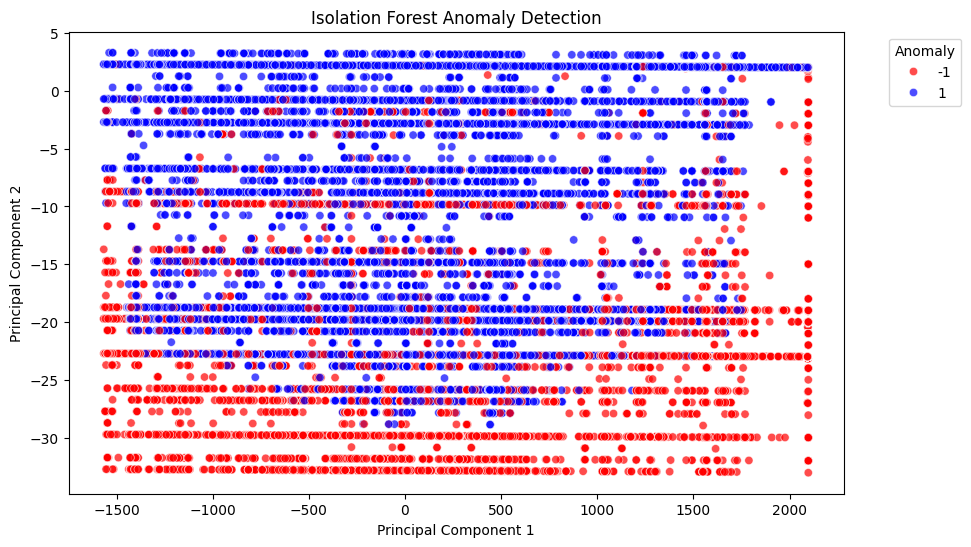

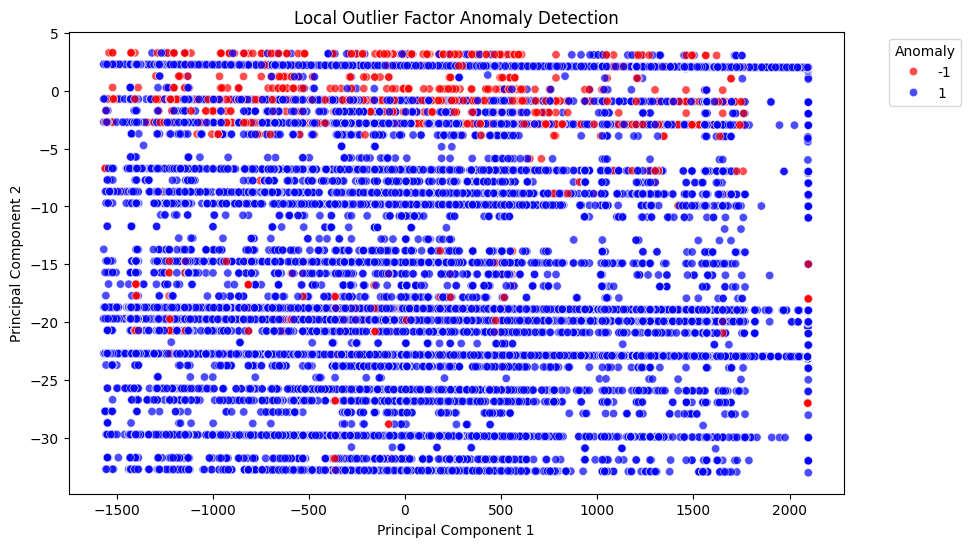

In [29]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Sample 10% of the data for faster computation (adjust percentage if needed)
X_sampled = X.sample(frac=1, random_state=42).values

# Apply PCA to reduce dimensions for anomaly visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled)

# Anomaly Detection: Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isolation_forest.fit(X_sampled)
anomalies_if = isolation_forest.predict(X_sampled)

# Visualize Isolation Forest Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=anomalies_if,
                palette={1: 'blue', -1: 'red'}, alpha=0.7)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Anomaly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Anomaly Detection: Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
anomalies_lof = lof.fit_predict(X_sampled)

# Visualize LOF Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=anomalies_lof, 
                palette={1: 'blue', -1: 'red'}, alpha=0.7)
plt.title('Local Outlier Factor Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Anomaly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Time Series Analysis

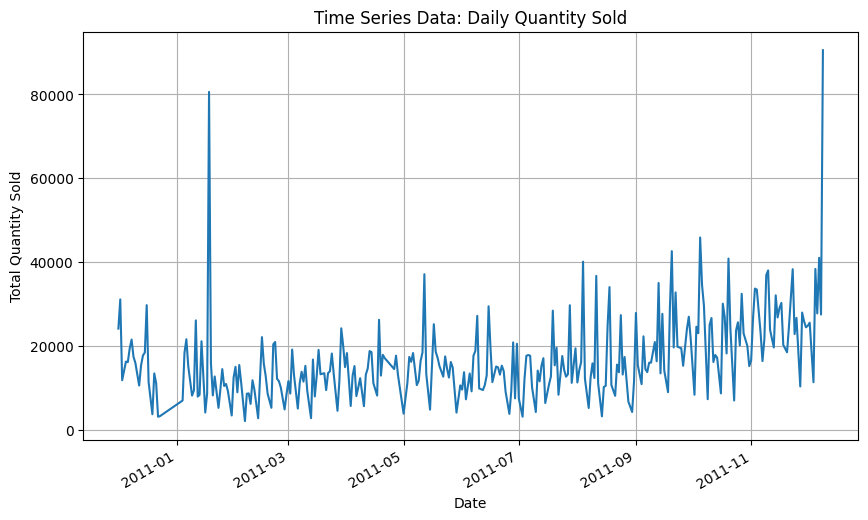

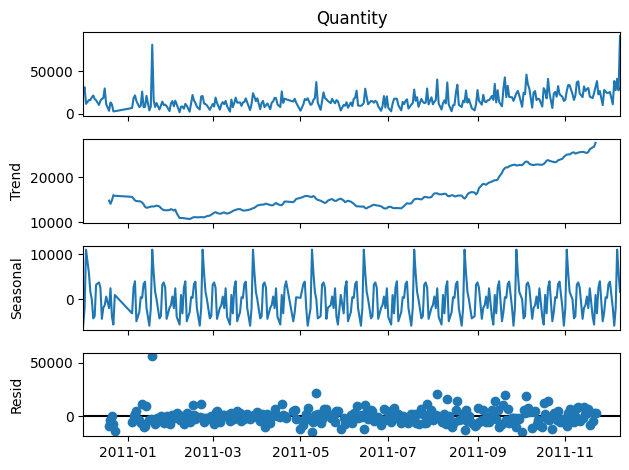

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  305
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3188.337
Date:                Fri, 13 Dec 2024   AIC                           6388.674
Time:                        20:18:45   BIC                           6410.977
Sample:                             0   HQIC                          6397.596
                                - 305                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8095      0.074    -10.973      0.000      -0.954      -0.665
ar.L2         -0.7586      0.074    -10.234      0.000      -0.904      -0.613
ar.L3         -0.6587      0.076     -8.643      0.0

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


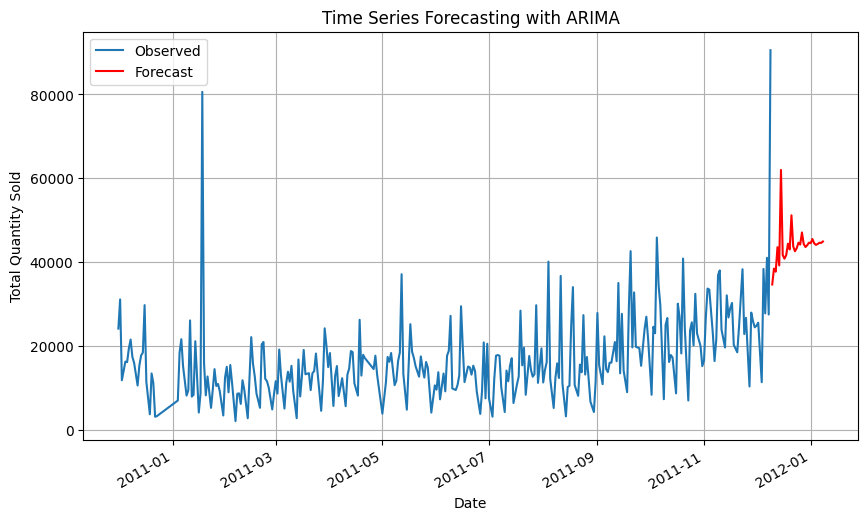

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('dataset/OnlineRetail_Preprocessed.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate data by date (e.g., total quantity sold per day)
time_series_data = df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum()
time_series_data.index = pd.to_datetime(time_series_data.index)

# Plot the time series data
plt.figure(figsize=(10, 6))
time_series_data.plot()
plt.title('Time Series Data: Daily Quantity Sold')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid()
plt.show()

# Decompose the time series to identify trends and seasonality
result = seasonal_decompose(time_series_data, model='additive', period=30)
result.plot()
plt.show()

# Fit ARIMA model
p, d, q = 5, 1, 0
arima_model = ARIMA(time_series_data, order=(p, d, q))
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())

# Forecast future values
forecast_steps = 30  # Forecast the next 30 days
forecast = arima_result.forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
time_series_data.plot(label='Observed')
forecast.index = pd.date_range(start=time_series_data.index[-1]
                                + pd.Timedelta(days=1), periods=forecast_steps)
forecast.plot(label='Forecast', color='red')
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid()
plt.show()


Text Mining and NLP

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('dataset/OnlineRetail_Preprocessed.csv')

# Assuming 'Description' column contains the names of items sold
descriptions = df['Description'].dropna().tolist()

# Tokenization
tokenized_descriptions = [word_tokenize(description) for description in descriptions]

# Stemming
stemmer = PorterStemmer()
stemmed_descriptions = [[stemmer.stem(word) for word in description] 
                        for description in tokenized_descriptions]

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
sentiments = [sid.polarity_scores(' '.join(description)) for description in stemmed_descriptions]

# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame(sentiments)

# Display the first few rows of the sentiment analysis results
print(sentiments_df.head())

# Add sentiment scores to the original DataFrame
df = df.join(sentiments_df)

# Save the DataFrame with sentiment scores to a new file
df.to_csv('dataset/OnlineRetail_Sentiment.csv', index=False)


   neg  neu  pos  compound
0  0.0  1.0  0.0       0.0
1  0.0  1.0  0.0       0.0
2  0.0  1.0  0.0       0.0
3  0.0  1.0  0.0       0.0
4  0.0  1.0  0.0       0.0
